In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data09 = pd.read_csv('Ano-2009.csv', delimiter=';')
data10 = pd.read_csv('Ano-2010.csv', delimiter=';')
data11 = pd.read_csv('Ano-2011.csv', delimiter=';')
data12 = pd.read_csv('Ano-2012.csv', delimiter=';')
data13 = pd.read_csv('Ano-2013.csv', delimiter=';')
data14 = pd.read_csv('Ano-2014.csv', delimiter=';')
data15 = pd.read_csv('Ano-2015.csv', delimiter=';')
data16 = pd.read_csv('Ano-2016.csv', delimiter=';')
data17 = pd.read_csv('Ano-2017.csv', delimiter=';')

/Users/caiosalgado/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (10,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# escolha o ano do seu candidato
for i in data15['txNomeParlamentar'].unique():
    print(i)

ABEL MESQUITA JR.
ABELARDO CAMARINHA
ABELARDO LUPION
ACELINO POPÓ
ADAIL CARNEIRO
ADALBERTO CAVALCANTI
ADELMO CARNEIRO LEÃO
ADELSON BARRETO
ADEMIR CAMILO
ADILTON SACHETTI
ADRIAN
AELTON FREITAS
AFONSO FLORENCE
AFONSO HAMM
AFONSO MOTTA
AGUINALDO RIBEIRO
AKIRA OTSUBO
ALAN RICK
ALBERTO FILHO
ALBERTO FRAGA
ALCEU MOREIRA
ALESSANDRO MOLON
ALEX CANZIANI
ALEX MANENTE
ALEXANDRE BALDY
ALEXANDRE LEITE
ALEXANDRE ROSO
ALEXANDRE SANTOS
ALEXANDRE SERFIOTIS
ALEXANDRE SILVEIRA
ALEXANDRE TOLEDO
ALEXANDRE VALLE
ALFREDO KAEFER
ALFREDO NASCIMENTO
ALFREDO SIRKIS
ALICE PORTUGAL
ALIEL MACHADO
ALINE CORRÊA
ALMEIDA LIMA
ALTINEU CÔRTES
ALUISIO MENDES
AMAURI TEIXEIRA
AMIR LANDO
ANA PERUGINI
ANDERSON FERREIRA
ANDRÉ ABDON
ANDRÉ DE PAULA
ANDRÉ FIGUEIREDO
ANDRÉ FUFUCA
ANDRE MOURA
ANDRÉ ZACHAROW
ANDREIA ZITO
ANDRES SANCHEZ
ANGELA ALBINO
ANGELIM
ÂNGELO AGNOLIN
ANGELO VANHONI
ANÍBAL GOMES
ANSELMO DE JESUS
ANTHONY GAROTINHO
ANTÔNIA LÚCIA
ANTÔNIO ANDRADE
ANTONIO BALHMANN
ANTONIO BRITO
ANTONIO BULHÕES
ANTONIO CARLOS MENDES T

In [ ]:
## espaço para vc pesquisar a respeito do seu candidato



In [4]:
# selecionando o deputado a ser pesquisado

df15 = data15[data15['txNomeParlamentar'] == 'EDUARDO BOLSONARO']
df16 = data16[data16['txNomeParlamentar'] == 'EDUARDO BOLSONARO']
df17 = data17[data17['txNomeParlamentar'] == 'EDUARDO BOLSONARO']

In [5]:
# juntando os anos em um dataframe
flavio = pd.concat([df15['vlrDocumento'].reset_index(drop=True),
                    df16['vlrDocumento'].reset_index(drop=True),
                    df17['vlrDocumento'].reset_index(drop=True)], axis=1)

In [6]:
# colocando os anos analisados
# renomeando as colunas
flavio.columns = ['2015', '2016', '2017']

In [7]:
flavio.head()

,2015,2016,2017
0,3179,888,"214,56"
1,"389,24","262,72","46,06"
2,"192,41","227,99","44,76"
3,"425,98","379,86","5328,1"
4,1308,"347,6","5328,1"


In [8]:
df09 = data09[data09['txNomeParlamentar'] == 'JAIR BOLSONARO']
df10 = data10[data10['txNomeParlamentar'] == 'JAIR BOLSONARO']
df11 = data11[data11['txNomeParlamentar'] == 'JAIR BOLSONARO']
df12 = data12[data12['txNomeParlamentar'] == 'JAIR BOLSONARO']
df13 = data13[data13['txNomeParlamentar'] == 'JAIR BOLSONARO']
df14 = data14[data14['txNomeParlamentar'] == 'JAIR BOLSONARO']
df15 = data15[data15['txNomeParlamentar'] == 'JAIR BOLSONARO']
df15 = data16[data16['txNomeParlamentar'] == 'JAIR BOLSONARO']
df16 = data17[data17['txNomeParlamentar'] == 'JAIR BOLSONARO']

In [9]:
# juntando os anos em um dataframe
jair = pd.concat([df09['vlrDocumento'].reset_index(drop=True),
                  df10['vlrDocumento'].reset_index(drop=True),
                  df11['vlrDocumento'].reset_index(drop=True),
                  df12['vlrDocumento'].reset_index(drop=True),
                  df13['vlrDocumento'].reset_index(drop=True),
                  df14['vlrDocumento'].reset_index(drop=True),
                  df15['vlrDocumento'].reset_index(drop=True),
                  df16['vlrDocumento'].reset_index(drop=True),
                  df17['vlrDocumento'].reset_index(drop=True)], axis=1)

In [11]:
jair.columns = ['2009','2010','2011','2012','2013','2014','2015', '2016', '2017']

In [21]:
jair.values.shape

(549, 9)

In [114]:
# nao alterar
def benford(lista, nome):
    l, c = lista.values.shape
    reais = np.zeros([c,10])
    for i in range(c):
        for j in range(l):
            if type(lista.values[:,i][j]) == type(0.1):
                break
            if lista.values[:,i][j][0] == '-':
                continue
            add = int(lista.values[:,i][j][0])
            reais[i][add] += 1
    reais = reais[:,1:]
    # somatorio do periodo
    newrow = reais.sum(axis=0)
    reais = np.vstack([reais, newrow])
    
    # regua
    benford = np.zeros(9)
    for i in range(9):
        benford[i]  = np.log10(i + 2) - np.log10(i + 1)
    esperados = np.array([reais[i].sum() * benford for i in range(c+1)])
    
    # qui quadrado
    qui = np.zeros(c+1)
    for i in range(c+1):
        for j in range(9):
            qui[i] += ((reais[i][j] - esperados[i][j])**2)/(esperados[i][j])
    eixo_x = np.array([0,2,4,6,8,10,12,14,16])
    
    
    ## plotando os graficos
    for i in range(c+1):
        if i == c:
            print('O valor do qui quadrado total foi de: ' + str(qui[i]))
        else:
            print('O valor do qui quadrado de {} foi: '.format(lista.columns[i])+ str(qui[i]))
        plt.bar(eixo_x,reais[i])
        plt.bar(eixo_x+1,esperados[i])
        if i == c:
            plt.title('Total')
        else:
            plt.title(lista.columns[i])
        
        plt.legend([nome,'Real'])
        plt.xticks(np.arange(18),('1','','2','','3','','4','','5','','6','','7','','8','','9',''))
        plt.show()
        print('')
    
    return reais

O valor do qui quadrado de 2015 foi: 11.4883996477


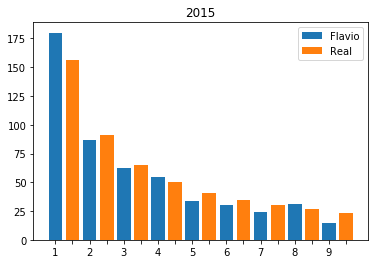


O valor do qui quadrado de 2016 foi: 46.3634402129


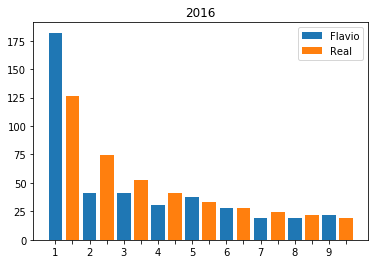


O valor do qui quadrado de 2017 foi: 22.9977115236


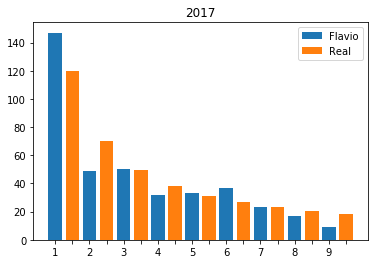


O valor do qui quadrado total foi de: 50.8011203535


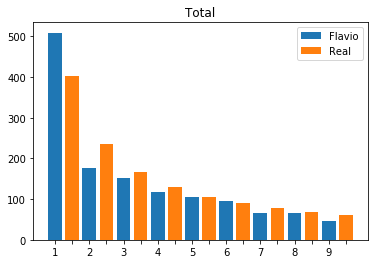

In [112]:
benford(flavio,'Flavio')

In [134]:
# valores retirados
for k in range(flavio.values.shape[1]):
    print('No ano de {} temos:'.format(flavio.columns[k]))
    for i in range(flavio.values[:,k].shape[0]):
        if type(flavio.values[:,k][i]) == type(0.1):
            continue
        if flavio.values[:,k][i][0] == '-':
            print(flavio.values[:,k][i])



No ano de 2015 temos:
No ano de 2016 temos:
No ano de 2017 temos:
-527,88
-167


O valor do qui quadrado de 2009 foi: 10.4968681674


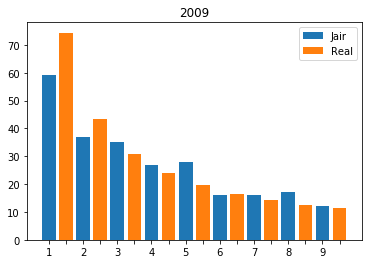


O valor do qui quadrado de 2010 foi: 39.8338626923


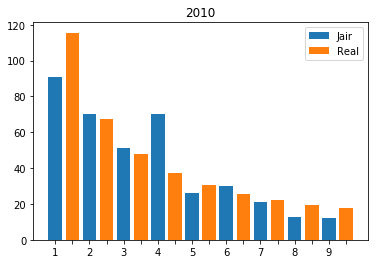


O valor do qui quadrado de 2011 foi: 30.3869823356


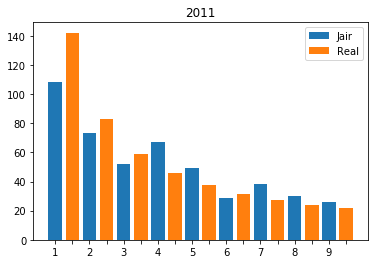


O valor do qui quadrado de 2012 foi: 77.5164529304


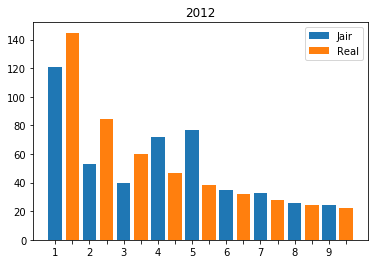


O valor do qui quadrado de 2013 foi: 30.8700367676


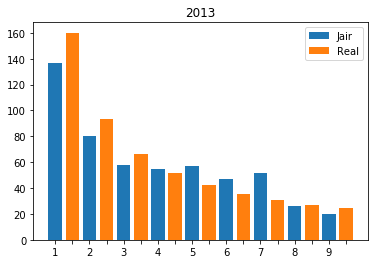


O valor do qui quadrado de 2014 foi: 64.6232154232


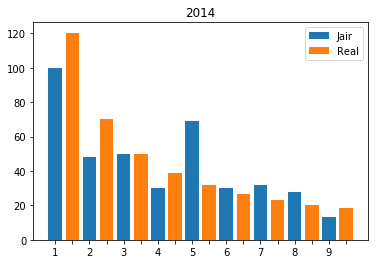


O valor do qui quadrado de 2015 foi: 31.1694575121


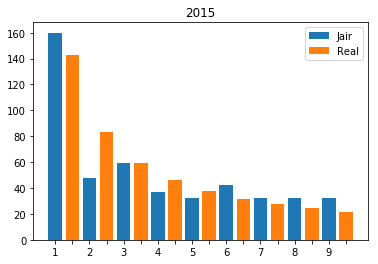


O valor do qui quadrado de 2016 foi: 37.974235697


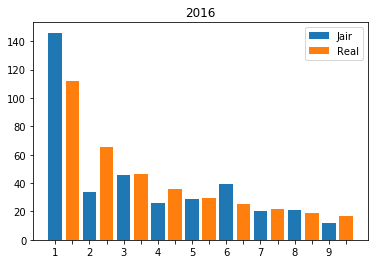


O valor do qui quadrado de 2017 foi: 22.9977115236


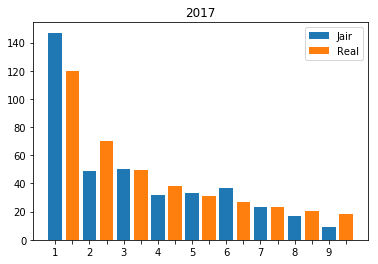


O valor do qui quadrado total foi de: 116.137715319


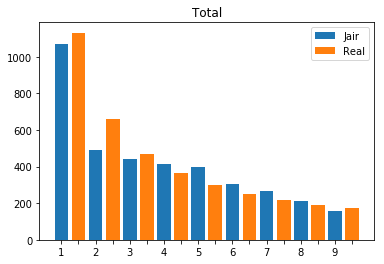

In [113]:
jair2 = benford(jair,'Jair')

In [132]:
# valores retirados
for k in range(jair.values.shape[1]):
    print('No ano de {} temos:'.format(jair.columns[k]))
    for i in range(jair.values[:,k].shape[0]):
        if type(jair.values[:,k][i]) == type(0.1):
            continue
        if jair.values[:,k][i][0] == '-':
            print(jair.values[:,k][i])


No ano de 2009 temos:
-468,62
-218,62
-599,62
-468,62
-599,62
-599,62
-528,62
-354,42
-749,62
No ano de 2010 temos:
-488,62
-544,42
-458,62
-398,62
-448,62
-398,62
-348,62
-458,62
-294,42
-338,62
-518,62
-498,62
-718,62
-448,62
-388,62
-548,62
-298,62
-504,42
-388,62
-344,42
-298,62
-223,62
-448,62
-398,62
-458,62
-219,42
-218,62
-334,16
-488,62
-558,62
-334,42
-488,62
-444,42
-444,42
-223,62
No ano de 2011 temos:
-600,56
-470,56
-270,56
-270,56
-470,56
-420,56
-750,56
-248,62
-409,56
-317,56
-342,56
-349,56
-557,56
-270,56
-560,56
-430,11
-392,56
-794,66
-994,66
-804,66
-343,02
-723,66
-1114,66
-793,62
-803,62
-416,86
-437,16
-1005,26
-1005,26
-210,16
No ano de 2012 temos:
-1267,63
-562,47
-237,56
-158
-550,57
-471,03
-669,18
-377,56
-259,56
-459,47
-404,03
-455,47
-402,03
-831,03
-550,57
-725,03
-549,03
-772,47
-465,47
-685,03
-398,97
-1003,03
-1411,13
-357,13
-486,57
-2016,13
-495,57
-790,57
-440,57
-542,57
No ano de 2013 temos:
-250,77
-1269,05
-1410,45
-487,03
-885,03
-610,03
-758